In [ ]:
# Usaremos la base de datos Covertype Data Set
# https://archive.ics.uci.edu/ml/datasets/Covertype

# Esta base de datos contiene información sobre tipos de bósques, capturada para
# pequeñas regiones de 30x30 metros. Los datos fueron colectados por el US Forest
# Service (USFS). Las variables independientes 'X' son cartográficas, y sus
# respectivas etiquetas 'Y' son enteros [1, 7] indicando 7 posibles clases de bosque.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento, como en los de validación y los de prueba,
# i.e., sin sobre ajuste.

# Part 1: Load dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [4]:
from my_path import my_path

In [5]:
# Read data file
df = pd.read_csv(my_path + '/covtype.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [ ]:
# Balance dataset
def sampling_k_elements(group, N=2700):
  if len(group) < N:
    return group
  return group.sample(N)

df = df.groupby('Cover_Type').apply(sampling_k_elements).reset_index(drop=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3034,15,3,150,-1,1405,217,233,154,2821,...,0,0,0,0,0,0,0,0,0,1
1,3483,117,12,794,198,2394,240,229,117,1224,...,0,0,0,0,0,0,0,0,1,1
2,3212,123,12,516,64,5807,240,231,120,1624,...,0,0,0,0,0,0,0,0,0,1
3,3440,69,8,488,62,1421,229,224,128,3776,...,0,0,0,1,0,0,0,0,0,1
4,3204,84,10,618,88,2024,234,224,121,2813,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,3319,72,10,108,5,1994,231,221,122,1057,...,0,0,0,0,0,0,0,1,0,7
18896,3445,354,9,541,106,1652,206,225,158,1332,...,0,0,0,0,0,0,0,0,1,7
18897,3478,18,14,511,130,4168,208,210,136,3358,...,0,0,0,0,0,0,0,0,1,7
18898,3377,168,29,379,218,1771,228,236,118,525,...,0,0,0,0,0,0,0,1,0,7


In [ ]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

1    2700
2    2700
3    2700
4    2700
5    2700
6    2700
7    2700
Name: Cover_Type, dtype: int64

In [ ]:
# Split training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.1)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(15309, 55)
(1701, 55)
(1890, 55)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


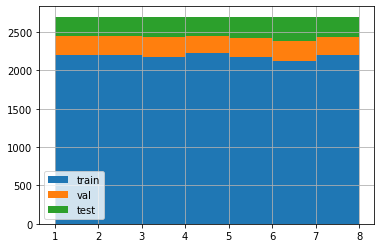

In [ ]:
# Visualize distribution of splits
plt.figure(figsize=(6, 4))
plt.hist([df_train['Cover_Type'], df_val['Cover_Type'], df_test['Cover_Type']],
         bins=range(1, 9), stacked=True, label=['train', 'val', 'test'])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# == Q1 ==
# En la celda siguiente convertimos las etiquetas a formato one-hot enconding.
# Nota que definimos num_classes=8, aunque la base de datos sólo contiene 7 clases.
# Revisa la documentación de la función to_categorical() para entender por qué
# indicamos 8 clases en nuestra conversión. Reporta tu respuesta.

In [ ]:
# Extract labels as matrices
y_train = df_train['Cover_Type'].to_numpy()
y_val = df_val['Cover_Type'].to_numpy()
y_test = df_test['Cover_Type'].to_numpy()
print(y_test[:10])

# And turn them into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)[:, 1:]
y_val = to_categorical(y_val, num_classes=8)[:, 1:]
y_test = to_categorical(y_test,num_classes=8)[:, 1:]

print("Y shapes")
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)
print(y_test[:10])

[6 1 6 2 7 1 3 7 1 6]
Y shapes
y_train: (15309, 7)
y_val: (1701, 7)
y_test: (1890, 7)
[[0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


X shapes
x_train: (15309, 54)
x_val: (1701, 54)
x_test: (1890, 54)


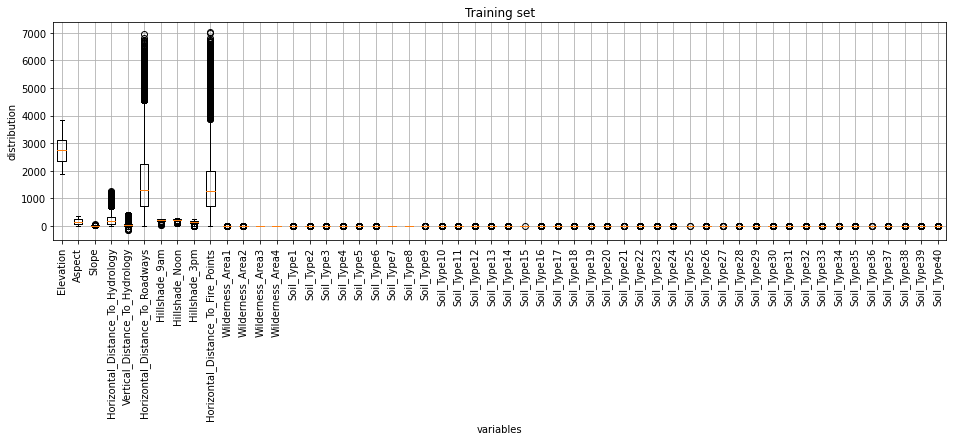

In [ ]:
# Extract independent variables as matrices
x_train = df_train.to_numpy()[:, :-1]
x_val = df_val.to_numpy()[:, :-1]
x_test = df_test.to_numpy()[:, :-1]

print("X shapes")
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

plt.figure(figsize=(16, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

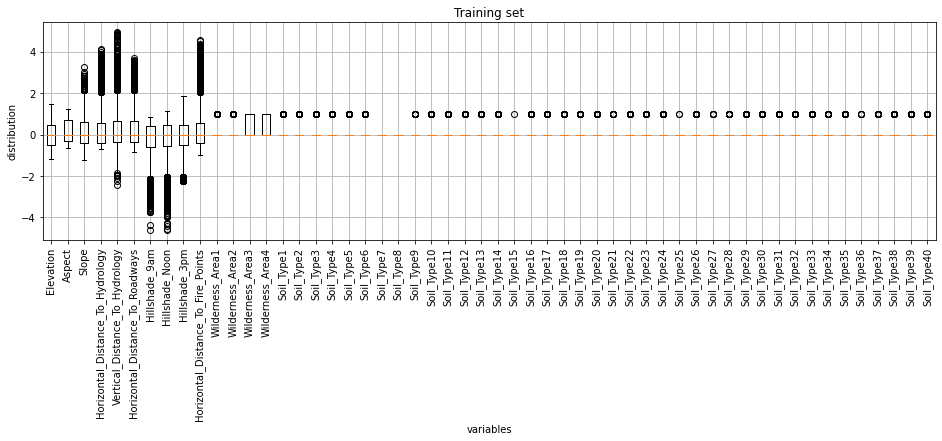

In [ ]:
# Scale and normalize
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

plt.figure(figsize=(16, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

# Part 2: Create DNN model and train it

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00


In [ ]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

#import keras_tuner as kt
#from keras_tuner.tuners import RandomSearch

In [ ]:
# == - ==
# La celda siguiente contiene una función auxiliar para crear ANN.
#
# Más adelante verás dos corridas de una misma arquitectura. La primera se entrenó
# por 200 épocas y resultó en sobre ajuste. La segunda usó early stopping para
# evitar sobre ajuste, pero resultó en sub ajuste.
#
# Encuentra un modelo que tenga buen desempeño de entrenamiento y bajo error de
# generalización. Tip, la forma común de hacer en DL es la siguiente:
# 1. Encuentra el mejor modelo posible para el set de entrenamiento (quizás genere sobre ajuste).
# 2. Si no hay sobre ajuste, ya terminamos.
# 3. Si hay sobre ajuste, ahora incluyamos regularizadores para disminuir el
#    error de generalización.
# 4. Es posible que al añadir regularizadores comprometamos el desempeño que el
#    modelo había obtenido en el set de entrenamiento, de manera que quizás sea
#    necesario aumentar la capacidad del modelo (más parámetros). Por lo tanto
#    este proceso se vuelve iterativo.

# Nota que importamos layers tipo BatchNorm y Dropout, los cuales pueden ser 
# usados en distintas secciones del modelo.
# También importamos regularizadores l1, l2, y l1_l2, los cuales pueden ser
# usados como argumentos de las capas de la red.
#
# "Puedes usar early stopping si lo consideras de utilidad".
#
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de
#     "entrenamiento" menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas, número de unidades en cada capa, y número de
#     parámetros.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y unidades)
#     en el siguiente modelo, y añade capas dropout (ajusta sus tasa), capas
#     batchnorm, y regularizadores l1 o l2 (ajusta sus alfas) para disminuir el
#     error de generalización.
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y unidades para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación (i.e., dale mayor capacidad).
#     Reporta tu mejor modelo.
# =======

In [ ]:
# AUX function to create a model
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))
  DNN.add(Dense(4096, activation='relu'))
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  return DNN

In [ ]:
# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4096)              225280    
                                                                 
 dense_18 (Dense)            (None, 7)                 28679     
                                                                 
Total params: 253,959
Trainable params: 253,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define training parameters
DNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# == Q6 ==
# En la celda anterior usamos 'categorical_accuracy' como métrica de monitoreo.
# Revisa la documentación de tensorflow, y explica la diferencia entre las
# métricas 'accuracy', 'binary_accuracy', y 'categorical_accuracy'.

In [ ]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=128, epochs=300, validation_data=(x_val, y_val))

Epoch 1/300
120/120 [==============================] - 1s 6ms/step - loss: 0.8920 - categorical_accuracy: 0.6496 - val_loss: 0.7141 - val_categorical_accuracy: 0.7078
Epoch 2/300
120/120 [==============================] - 1s 4ms/step - loss: 0.6479 - categorical_accuracy: 0.7324 - val_loss: 0.6303 - val_categorical_accuracy: 0.7349
Epoch 3/300
120/120 [==============================] - 0s 3ms/step - loss: 0.5914 - categorical_accuracy: 0.7564 - val_loss: 0.5834 - val_categorical_accuracy: 0.7625
Epoch 4/300
120/120 [==============================] - 0s 3ms/step - loss: 0.5422 - categorical_accuracy: 0.7805 - val_loss: 0.5650 - val_categorical_accuracy: 0.7666
Epoch 5/300
120/120 [==============================] - 0s 3ms/step - loss: 0.5138 - categorical_accuracy: 0.7947 - val_loss: 0.5498 - val_categorical_accuracy: 0.7701
Epoch 6/300
120/120 [==============================] - 0s 3ms/step - loss: 0.4863 - categorical_accuracy: 0.8029 - val_loss: 0.5301 - val_categorical_accuracy: 0.784

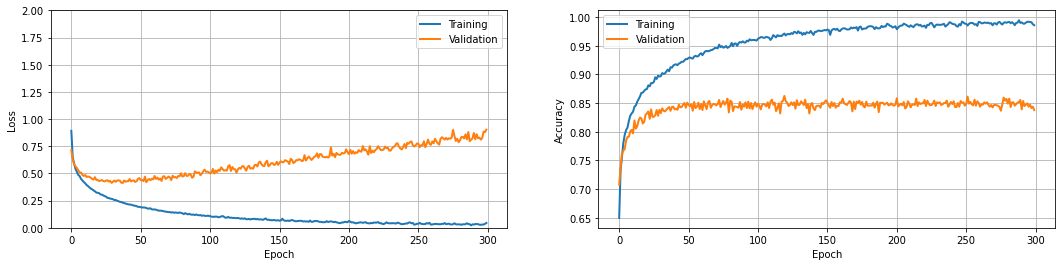

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# AUX function to create a model
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(4096, activation='selu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.2))
  DNN.add(Dense(256, activation='swish'))
  DNN.add(BatchNormalization())
  
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  return DNN

In [ ]:
DNN2 = create_model()
DNN2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4096)              225280    
                                                                 
 dropout_7 (Dropout)         (None, 4096)              0         
                                                                 
 dense_23 (Dense)            (None, 256)               1048832   
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 1,276,935
Trainable params: 1,276,423
Non-trainable params: 512
__________________________________________

In [ ]:
# Train another model using earlystopping
DNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy', 'categorical_accuracy'])
DNN2.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

DNN2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['categorical_crossentropy', 'categorical_accuracy'])
DNN2.fit(x=x_train, y=y_train, batch_size=64, epochs=500, validation_data=(x_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
209/209 [==============================] - 2s 5ms/step - loss: 0.8012 - categorical_crossentropy: 0.7229 - categorical_accuracy: 0.7060 - val_loss: 0.6959 - val_categorical_crossentropy: 0.6300 - val_categorical_accuracy: 0.7272
Epoch 2/100
209/209 [==============================] - 1s 5ms/step - loss: 0.6198 - categorical_crossentropy: 0.5607 - categorical_accuracy: 0.7645 - val_loss: 0.6395 - val_categorical_crossentropy: 0.5856 - val_categorical_accuracy: 0.7664
Epoch 3/100
209/209 [==============================] - 1s 4ms/step - loss: 0.5793 - categorical_crossentropy: 0.5274 - categorical_accuracy: 0.7749 - val_loss: 0.5142 - val_categorical_crossentropy: 0.4645 - val_categorical_accuracy: 0.8089
Epoch 4/100
209/209 [==============================] - 1s 4ms/step - loss: 0.5569 - categorical_crossentropy: 0.5078 - categorical_accuracy: 0.7851 - val_loss: 0.5305 - val_categorical_crossentropy: 0.4823 - val_categorical_accuracy: 0.8055
Epoch 5/100
209/209 [===============

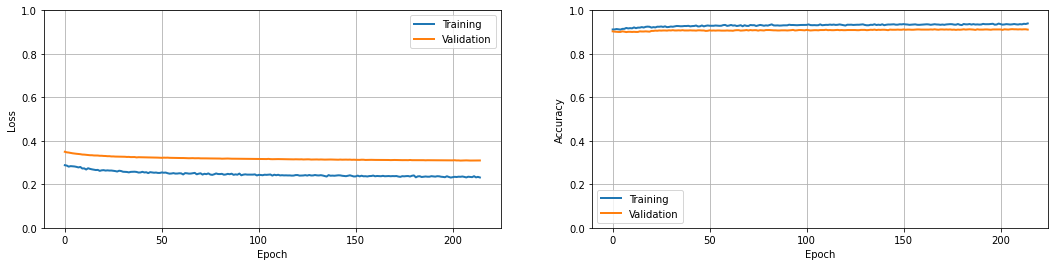

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN2.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN2.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

plt.show()

In [ ]:
# Compute test loss
test_loss = DNN2.evaluate(x=x_test, y=y_test, verbose=False)
test_loss

[0.33465775847435, 0.2728075385093689, 0.9027946591377258]

In [ ]:
# Predict on test set
y_test_hat = DNN2.predict(x=x_test)
print(y_test_hat.shape)
print(y_test_hat[:10].round())

52/52 [==============================] - 0s 3ms/step
(1646, 7)
[[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

print(y_test_hat_cat[:10])
print(y_test_cat[:10])

[4 0 1 1 3 3 1 2 6 5]
[4 0 1 1 3 3 1 2 6 5]


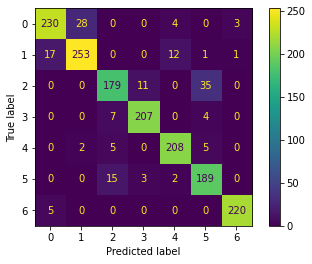

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)

ConfusionMatrixDisplay.from_predictions(y_test_cat, y_test_hat_cat)
plt.show()